In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
data=pd.read_excel(r'D:\ICT\Assignments\Assignment 7\Dataset\iris.xlsx')

In [168]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [170]:
data.shape

(150, 5)

In [172]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [174]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

### Handling Missing Values 

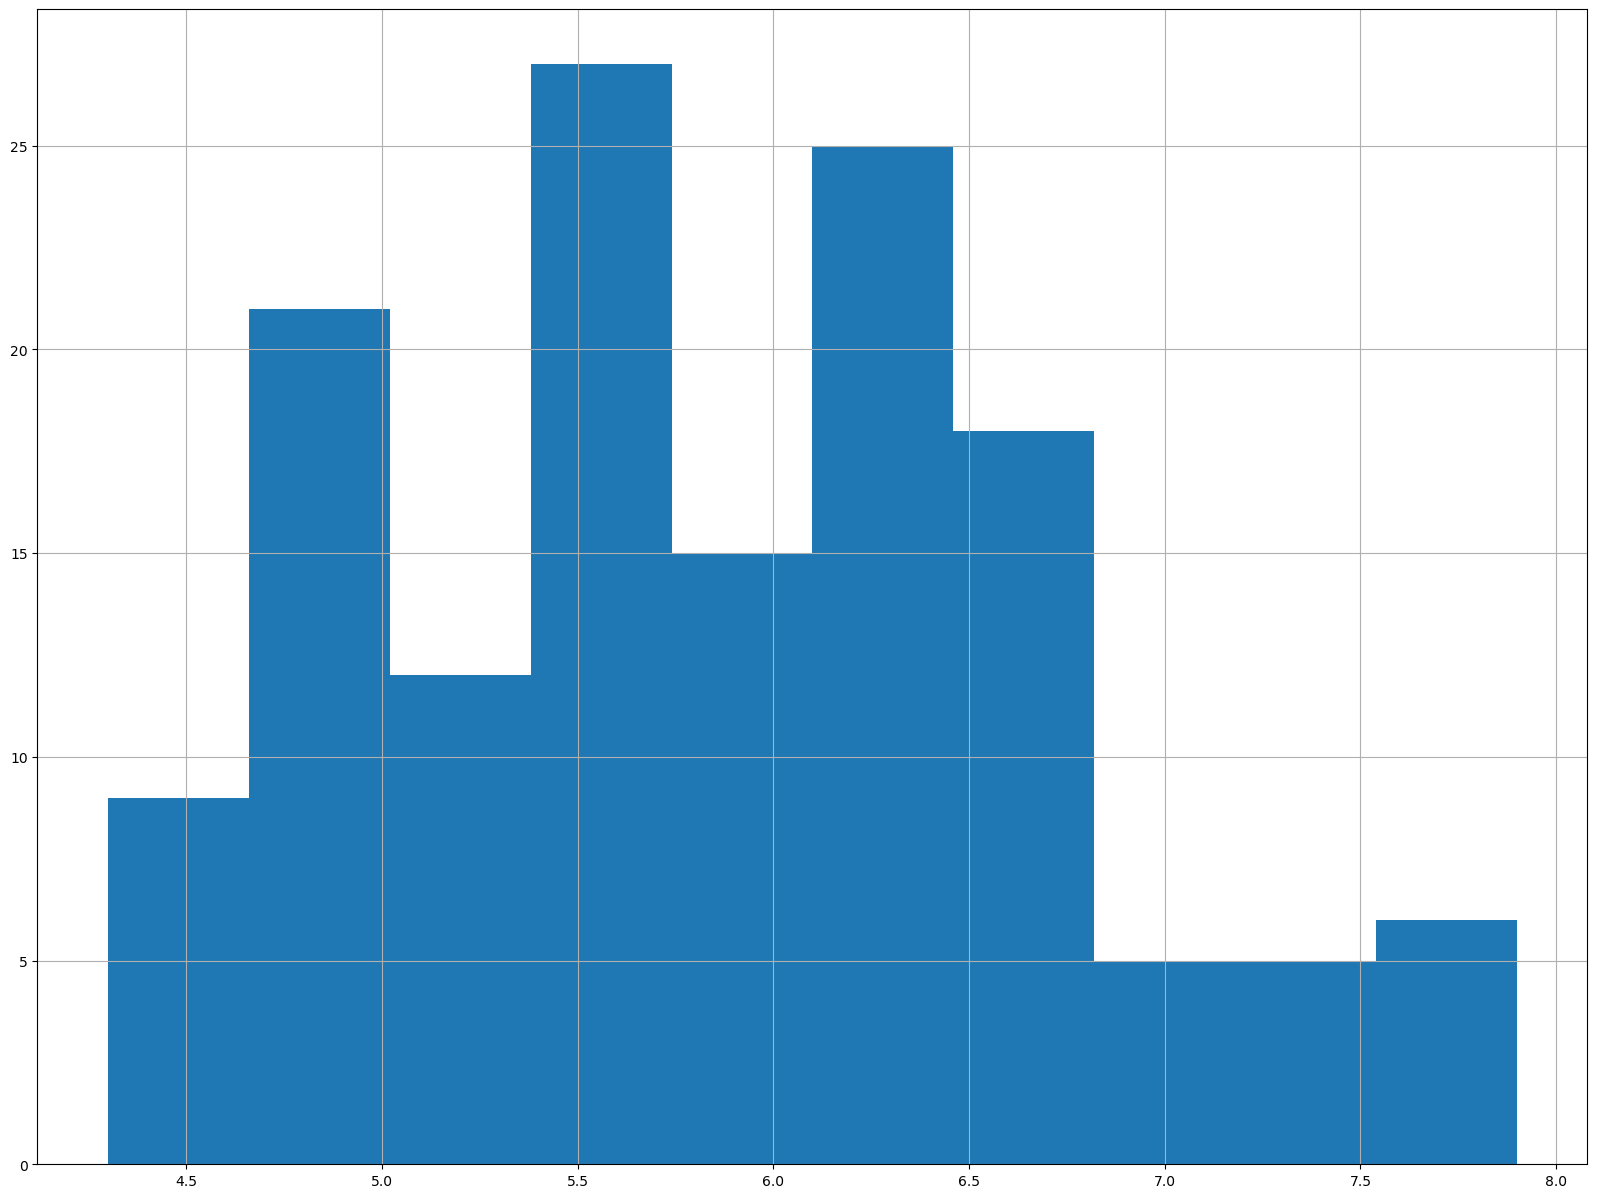

In [177]:
data['SL'].hist(figsize=[20,15])
plt.show()

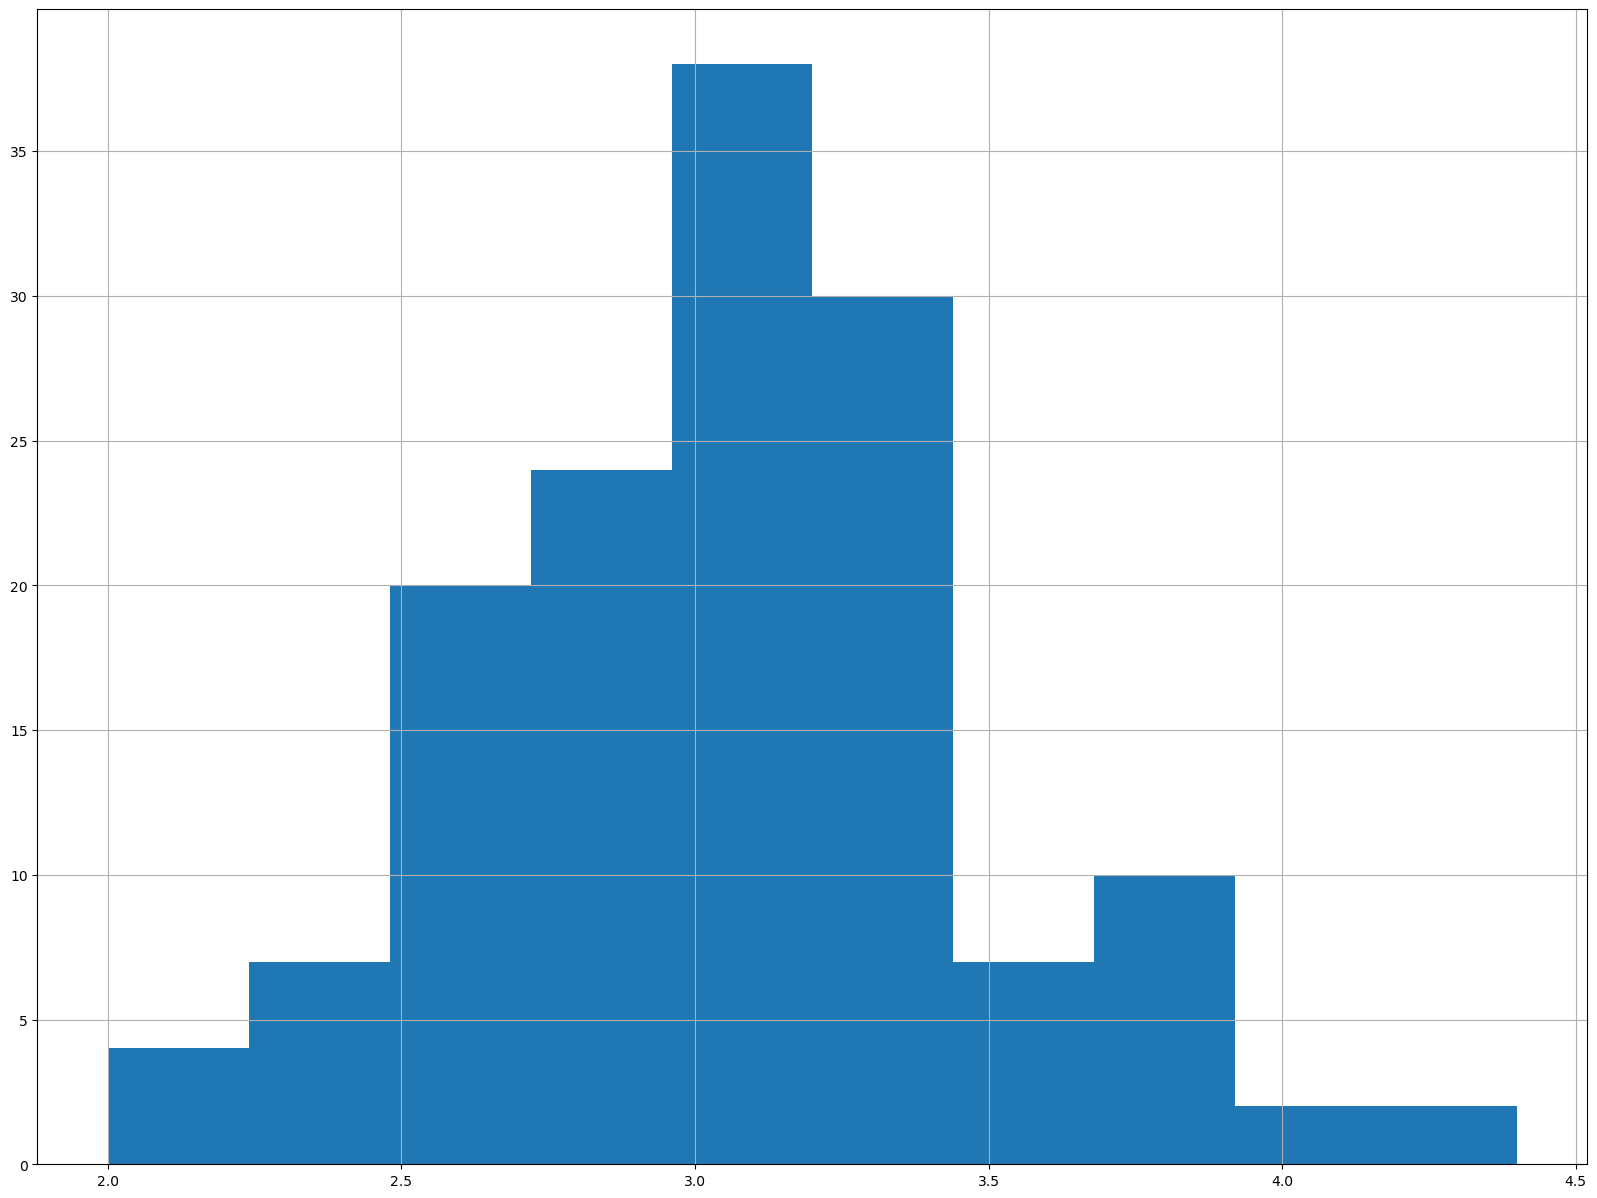

In [179]:
data['SW'].hist(figsize=[20,15])
plt.show()

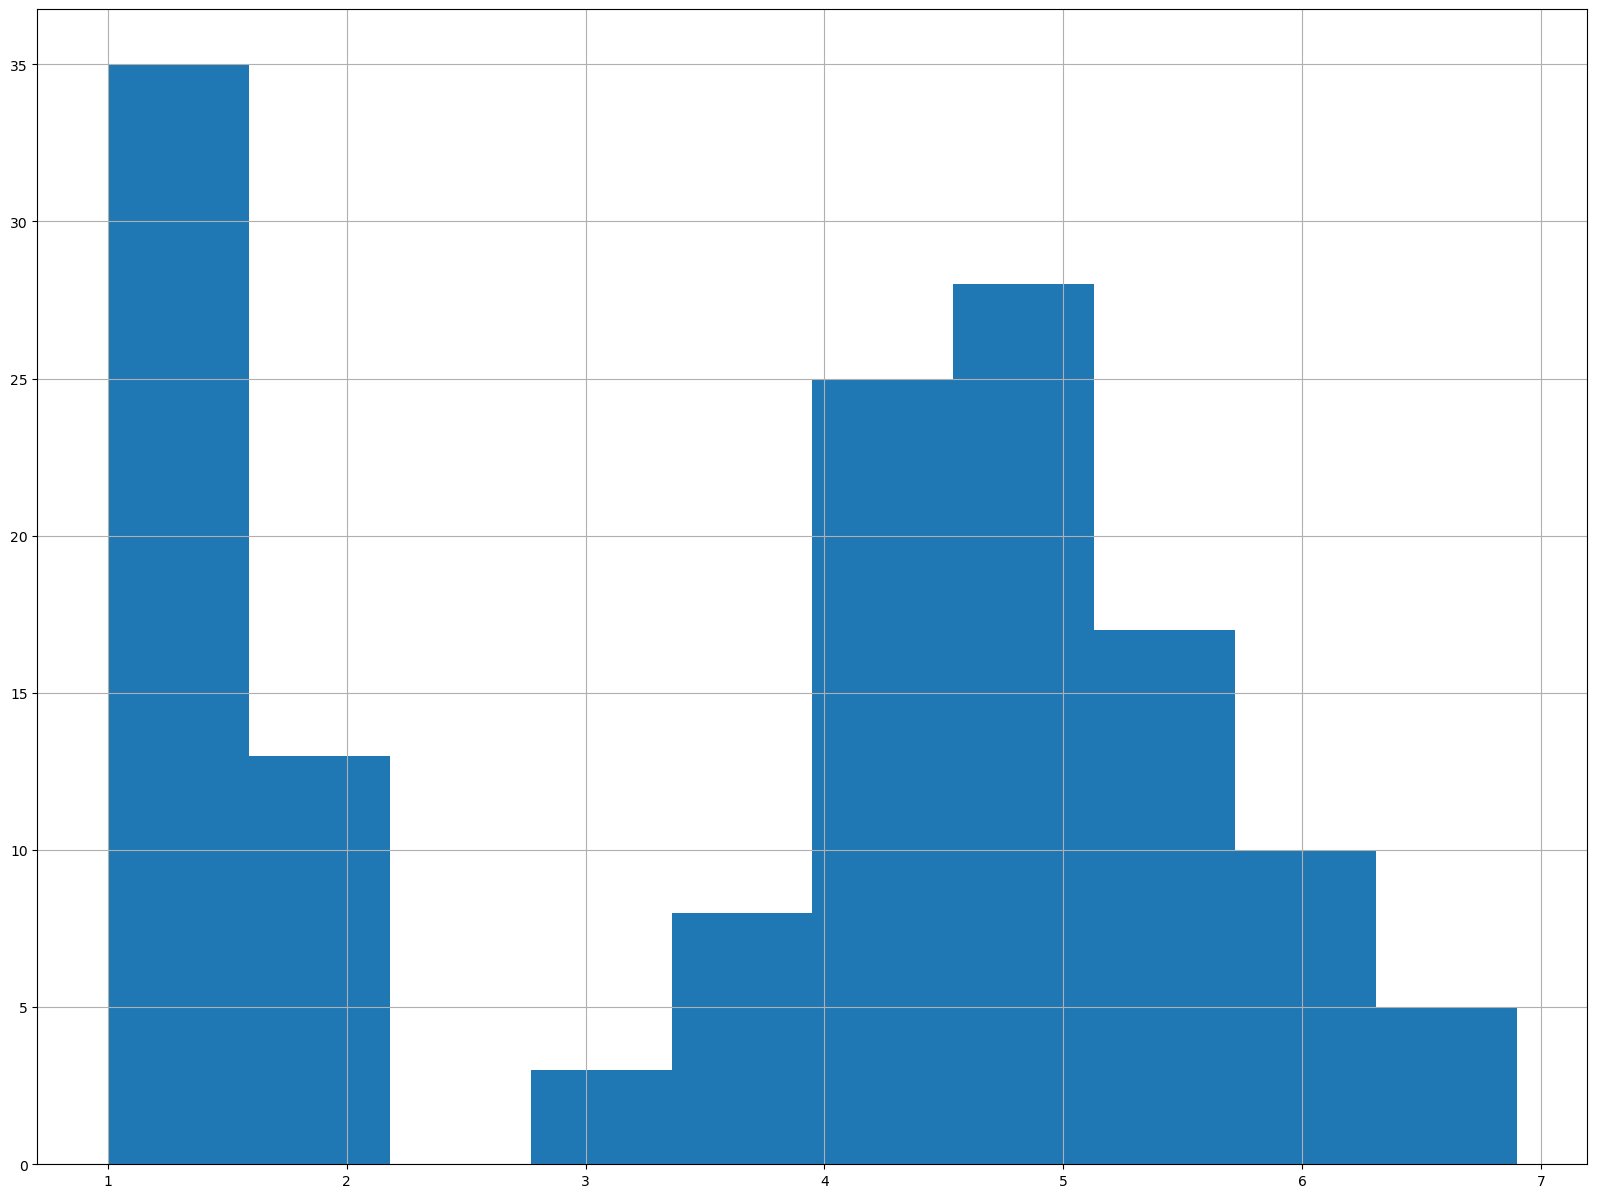

In [181]:
data['PL'].hist(figsize=[20,15])
plt.show()

In [183]:
freq_graph=data.select_dtypes(include='float')

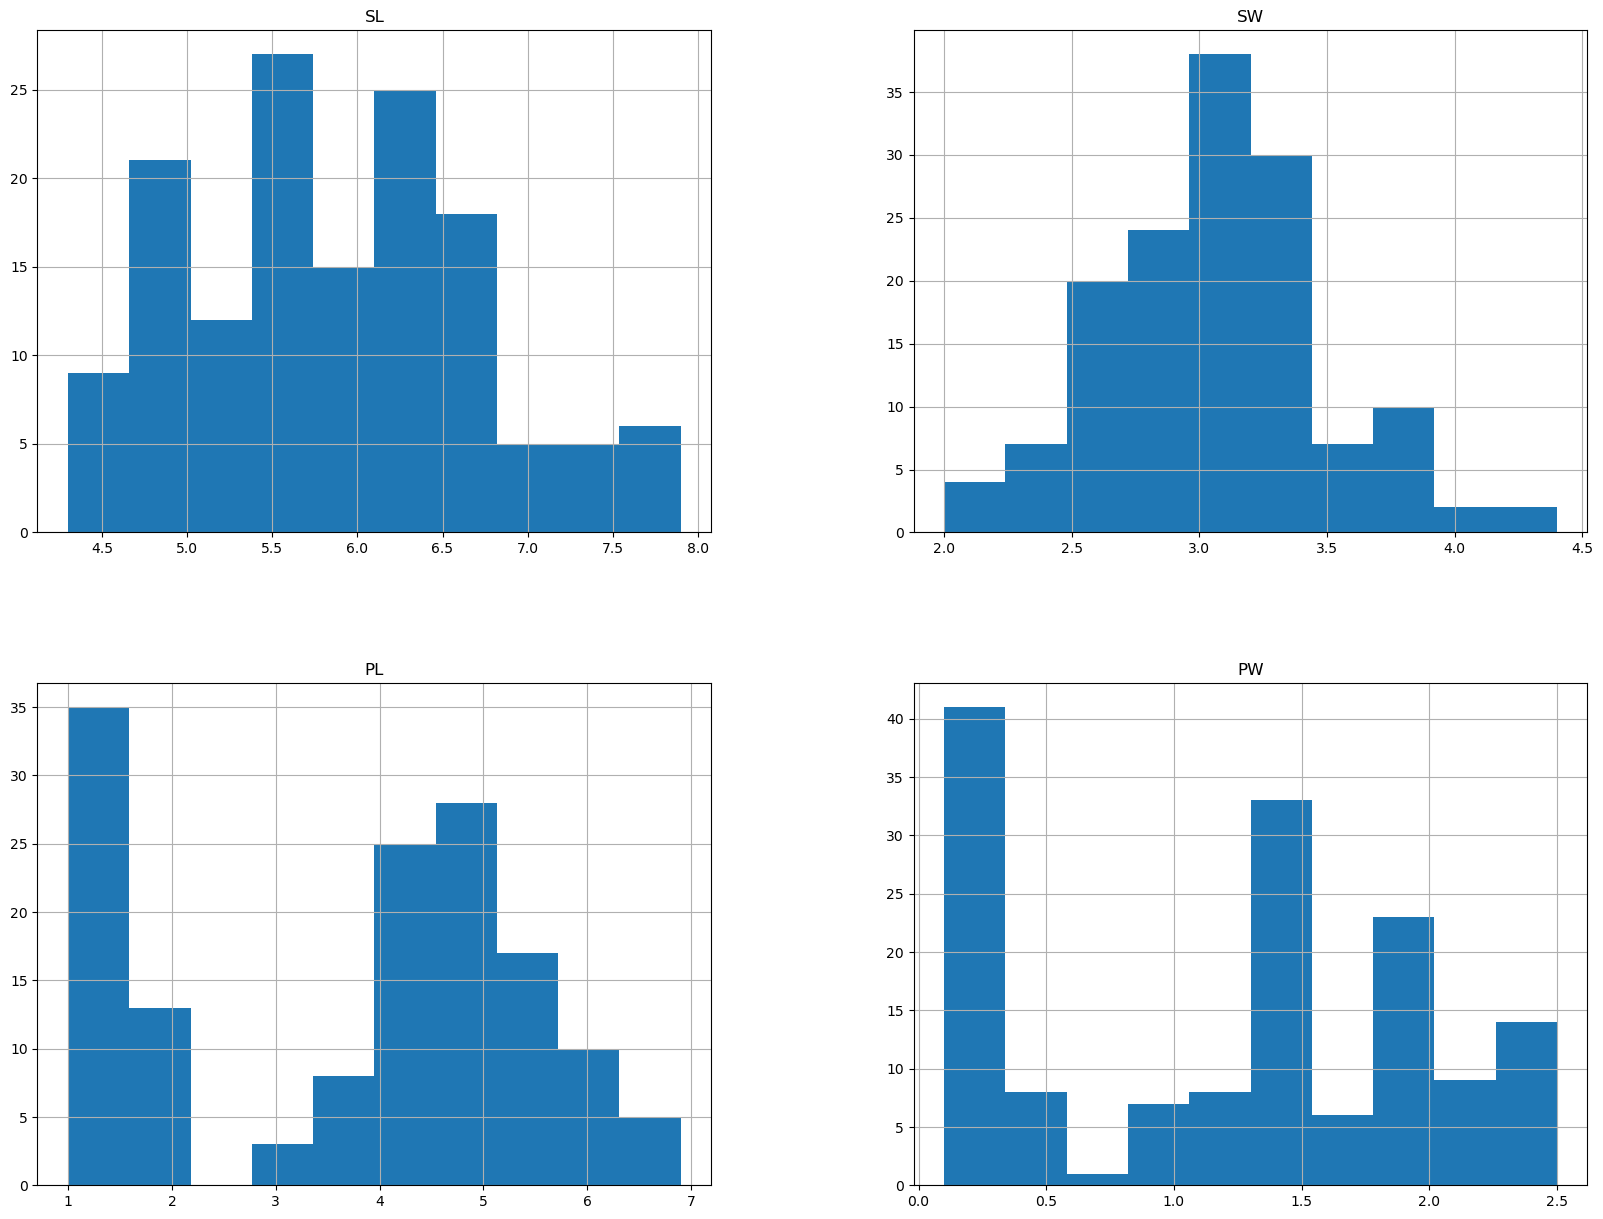

In [185]:
freq_graph.hist(figsize=[20,15])
plt.show()

In [187]:
# Skewed data, filling missing values with median

In [189]:
for i in ['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].median())

In [191]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [193]:
data1=data.drop(['Classification'],axis=1)

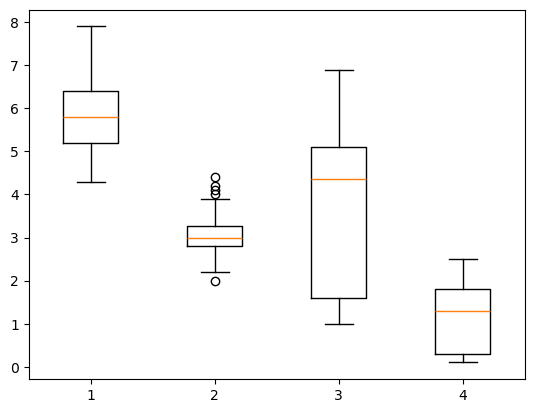

In [195]:
plt.boxplot(data1)
plt.show()

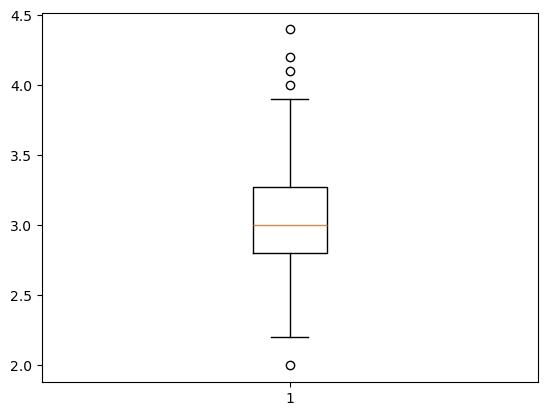

In [197]:
plt.boxplot(data['SW'])
plt.show()

### Handling Outliers

In [200]:
Q1=np.percentile(data['SW'],25)
Q1

2.8

In [202]:
Q3=np.percentile(data['SW'],75)
Q3

3.275

In [206]:
IQR=Q3-Q1
IQR

0.4750000000000001

In [208]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [210]:
lower_limit

2.0874999999999995

In [212]:
upper_limit

3.9875

In [214]:
upper_array=np.where(data['SW']>=upper_limit)[0]
lower_array=np.where(data['SW']<=lower_limit)[0]

In [216]:
upper_array

array([14, 15, 32, 33], dtype=int64)

In [218]:
lower_array

array([60], dtype=int64)

In [220]:
data.drop(index=upper_array,inplace=True)

In [222]:
data.drop(index=lower_array,inplace=True)

In [224]:
data.shape

(145, 5)

In [226]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [228]:
data['Classification'].value_counts()

Classification
Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: count, dtype: int64

In [230]:
data['Classification'].value_counts(normalize=True)

Classification
Iris-virginica     0.344828
Iris-versicolor    0.337931
Iris-setosa        0.317241
Name: proportion, dtype: float64

In [234]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Classification']=le.fit_transform(data['Classification'])

In [236]:
x=data.drop('Classification',axis=1)

In [240]:
x.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,5.8,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [238]:
y=data['Classification']

In [242]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Classification, dtype: int64

In [244]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

### Logistic Regression

In [246]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg=log_reg.fit(x_train,y_train)

In [248]:
y_pred=log_reg.predict(x_test)

In [250]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score,f1_score

In [252]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))
print('Precision is : ',precision_score(y_test,y_pred,average='macro'))
print('Recall is : ',recall_score(y_test,y_pred,average='macro'))
print('F1 score is : ',f1_score(y_test,y_pred,average='macro'))
print('Confusion Matrix is : ',confusion_matrix(y_test,y_pred,))

Accuracy is:  0.8918918918918919
Precision is :  0.8834498834498835
Recall is :  0.8915343915343915
F1 score is :  0.8839506172839506
Confusion Matrix is :  [[13  1  0]
 [ 0  8  1]
 [ 0  2 12]]


### k-NN

In [255]:
from sklearn.neighbors import KNeighborsClassifier

In [259]:
metric_k=[]
neighbors=np.arange(3,15)

In [261]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors= k, metric='euclidean')
    classifier.fit(x_train,y_train)
    y_predictions=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_predictions)
    metric_k.append(acc)

In [50]:
metric_k

[0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8918918918918919,
 0.8378378378378378,
 0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8648648648648649,
 0.8648648648648649]

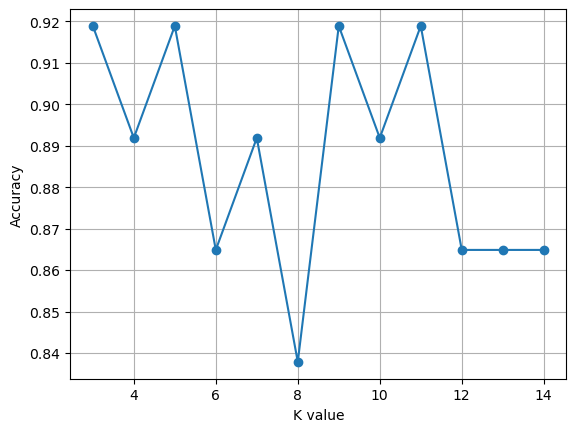

In [263]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()

In [265]:
classifier=KNeighborsClassifier(n_neighbors= 9, metric='euclidean')
classifier.fit(x_train,y_train)
y_predictions=classifier.predict(x_test)

In [267]:
print('Accuracy is: ',accuracy_score(y_test,y_predictions))
print('Precision is : ',precision_score(y_test,y_predictions,average='macro'))
print('Recall is : ',recall_score(y_test,y_predictions,average='macro'))
print('F1 score is : ',f1_score(y_test,y_predictions,average='macro'))

Accuracy is:  0.918918918918919
Precision is :  0.9095238095238095
Recall is :  0.9153439153439153
F1 score is :  0.9112132182307621


In [269]:
confusion_matrix(y_test,y_predictions)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

### Naive Bayes

In [272]:
from sklearn.naive_bayes import GaussianNB

In [274]:
nb_classifier=GaussianNB()
nb_classifier.fit(x_train,y_train)

GaussianNB()

In [276]:
y_predict=nb_classifier.predict(x_test)

In [278]:
print('Accuracy is: ',accuracy_score(y_test,y_predict))
print('Precision is : ',precision_score(y_test,y_predict,average='macro'))
print('Recall is : ',recall_score(y_test,y_predict,average='macro'))
print('F1 score is : ',f1_score(y_test,y_predict,average='macro'))

Accuracy is:  0.9459459459459459
Precision is :  0.9393939393939394
Recall is :  0.9523809523809524
F1 score is :  0.9410256410256409


In [280]:
confusion_matrix(y_test,y_predict)

array([[14,  0,  0],
       [ 0,  9,  0],
       [ 0,  2, 12]], dtype=int64)

### Support Vector Machine

In [283]:
from sklearn.svm import SVC

In [285]:
svm_cls=SVC(kernel='linear')
svm_cls=svm_cls.fit(x_train,y_train)

In [287]:
y_pred_svm=svm_cls.predict(x_test)

In [289]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [291]:
confusion_matrix(y_test,y_pred_svm)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

In [293]:
accuracy_score(y_test,y_pred_svm)

0.918918918918919

In [295]:
precision_score(y_test,y_pred_svm,average='macro')

0.9076923076923077

In [297]:
svm_cls1=SVC(kernel='rbf')
svm_cls1=svm_cls1.fit(x_train,y_train)

In [299]:
y_pred_svm1=svm_cls1.predict(x_test)

In [301]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [303]:
confusion_matrix(y_test,y_pred_svm1)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  3, 11]], dtype=int64)

In [305]:
accuracy_score(y_test,y_pred_svm1)

0.8648648648648649

In [307]:
precision_score(y_test,y_pred_svm1,average='macro')

0.861111111111111

### Decision Tree

In [309]:
from sklearn.tree import DecisionTreeClassifier

In [311]:
dt_cls=DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred_dt=dt_cls.predict(x_test)

In [313]:
confusion_matrix(y_test,y_pred_dt)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

In [315]:
accuracy_score(y_test,y_pred_dt)

0.918918918918919

In [317]:
precision_score(y_test,y_pred_dt,average='macro')

0.9076923076923077

### Random Forest

In [319]:
from sklearn.ensemble import RandomForestClassifier

In [323]:
rf_cls=RandomForestClassifier()
rf_cls=rf_cls.fit(x_train,y_train)
y_pred_rf=rf_cls.predict(x_test)

In [325]:
confusion_matrix(y_test,y_pred_rf)

array([[14,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 13]], dtype=int64)

In [327]:
accuracy_score(y_test,y_pred_rf)

0.9459459459459459

In [329]:
precision_score(y_test,y_pred_rf,average='macro')

0.9391534391534391

In [ ]:
# From Metric Values Naive Bayes and Random forest are almost giving same good Model